In [1]:
import pyfeyn2
from feynml import *
# import renders
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.render.all import AllRender
from pyfeyn2.render.text.ascii import ASCIIRender
from pyfeyn2.render.text.unicode import UnicodeRender
# auto
from pyfeyn2.auto.position import  auto_align_legs, scale_positions
from pyfeyn2.auto.position import feynman_adjust_points
from pyfeyn2.auto.label import auto_label
from pyfeyn2.auto.position import auto_align_legs,auto_grid
from pyfeyn2.auto.position import auto_vdw,auto_grid
from pyfeyn2.auto.bend import auto_bend
# util
import numpy as np
from xsdata.formats.dataclass.parsers import XmlParser
from pyqgraf import qgraf, model
from feynml.interface.qgraf import style


	Please cite the following papers if you use this code:

      [1] Automatic Feynman graph generation J. Comput. Phys. 105 (1993) 279--289 https://doi.org/10.1006/jcph.1993.1074

      [2] Abusing Qgraf Nucl. Instrum. Methods Phys. Res. A 559 (2006) 220--223 https://doi.org/10.1016/j.nima.2005.11.151

      [3] Feynman graph generation and propagator mixing, I Comput. Phys. Commun. 269 (2021) 108103 https://doi.org/10.1016/j.cpc.2021.108103

	


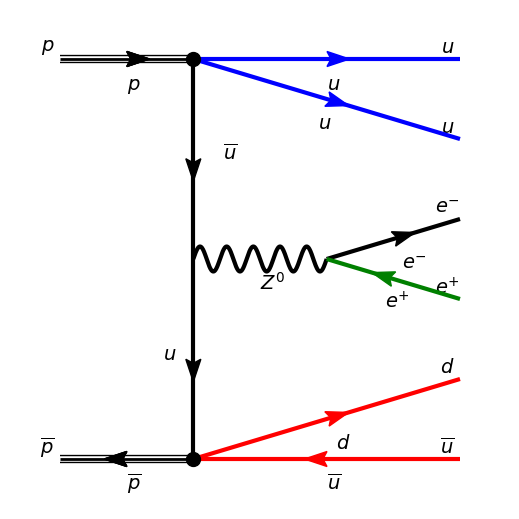

In [2]:
fd = FeynmanDiagram().add(
    v1 := Vertex().with_xy(5,0),
    v2 := Vertex().with_xy(10,0),
    v3 := Vertex().with_xy(5,+5).with_shape('blob'),
    v4 := Vertex().with_xy(5,-5).with_shape('blob'),
    Propagator(pdgid=23).connect(v1,v2),
    Propagator(pdgid=-2).connect(v1,v3),
    Propagator(pdgid=2).connect(v1,v4),
    Leg(pdgid=2212,target=v3,sense='incoming').with_xy(0,5).with_style("double-distance: 15"),
    Leg(pdgid=-2212,target=v4).with_incoming().with_xy(0,-5),
    Leg(pdgid=11,sense='outgoing').with_target(v2).with_xy(15,1),
    Leg(pdgid=-11).with_target(v2).with_outgoing().with_xy(15,-1).with_color('green'),
    Leg(pdgid=2,sense='outgoing').with_target(v3).with_xy(15,+5).with_color('blue'),
    Leg(pdgid=2,sense='outgoing').with_target(v3).with_xy(15,+3).with_color('blue'),
    Leg(pdgid=-2).with_target(v4).with_outgoing().with_xy(15,-5).with_color('red'),
    Leg(pdgid=1).with_target(v4).with_outgoing().with_xy(15,-3).with_color('red'),
)
fd.render(auto_position=False,render="feynman")

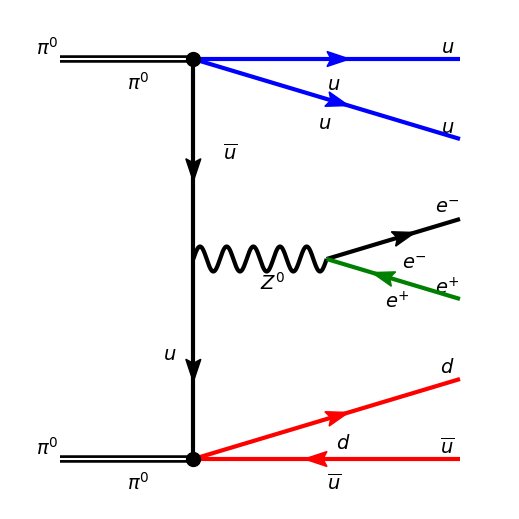

In [3]:
fd = FeynmanDiagram().add(
    v1 := Vertex().with_xy(5,0),
    v2 := Vertex().with_xy(10,0),
    v3 := Vertex().with_xy(5,+5).with_shape('blob'),
    v4 := Vertex().with_xy(5,-5).with_shape('blob'),
    Propagator(pdgid=23).connect(v1,v2),
    Propagator(pdgid=-2).connect(v1,v3),
    Propagator(pdgid=2).connect(v1,v4),
    Leg(pdgid=111,target=v3,sense='incoming').with_xy(0,5),
    Leg(pdgid=111,target=v4).with_incoming().with_xy(0,-5),
    Leg(pdgid=11,sense='outgoing').with_target(v2).with_xy(15,1),
    Leg(pdgid=-11).with_target(v2).with_outgoing().with_xy(15,-1).with_color('green'),
    Leg(pdgid=2,sense='outgoing').with_target(v3).with_xy(15,+5).with_color('blue'),
    Leg(pdgid=2,sense='outgoing').with_target(v3).with_xy(15,+3).with_color('blue'),
    Leg(pdgid=-2).with_target(v4).with_outgoing().with_xy(15,-5).with_color('red'),
    Leg(pdgid=1).with_target(v4).with_outgoing().with_xy(15,-3).with_color('red'),
)
fd.render(auto_position=False,render="feynman")